# Movie Recommendation System

In [24]:
#importing librairies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression

In [25]:
#read csv
df1=pd.read_csv("movies.csv")
df2=pd.read_csv('ratings.csv')

In [41]:
df1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [42]:
df2

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [38]:
#Creating a list that contains all the unique genres from the genres column in df1
l = set(df1["genres"].unique().tolist())
l2 = [i.split('|', 9) for i in l]
l3 = list(itertools.chain(*l2))
l4 = list(set(l3))
l4.sort()


Wall time: 0 ns


In [6]:
#Using a for loop that will create a column for each genre in our list and return True or False depending on if the column "genres" contains the genre
for x in l4:
    df1[x] = df1["genres"].str.contains(x)
df1

C:\Users\flrnt\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
10325,146878,Le Grand Restaurant (1966),Comedy,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10326,148238,A Very Murray Christmas (2015),Comedy,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10327,148626,The Big Short (2015),Drama,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#Using a for loop to replace booleans with integers, also dropping the genres column which is no longer needed
for col in df1.columns[3:]:
    df1[col]=df1[col].astype(int)
df1=df1.drop(columns=['genres'])
df1.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Merge datasets to create final dataframe with proper arrays to be used with scikit learn
df3= df2.merge(right= df1, on ="movieId")
df3.head()

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,16,4.0,1217897793,Casino (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,16,4.0,842686699,Casino (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,16,1.5,1144396284,Casino (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,16,4.0,963468757,Casino (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29,16,3.0,836820223,Casino (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Checking the ratings count :

ratings_count = pd.DataFrame(df3.groupby('title')['rating'].count().sort_values(ascending=False))
ratings_count.head(10)

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290
Star Wars: Episode IV - A New Hope (1977),273
"Matrix, The (1999)",261
Terminator 2: Judgment Day (1991),253
Schindler's List (1993),248


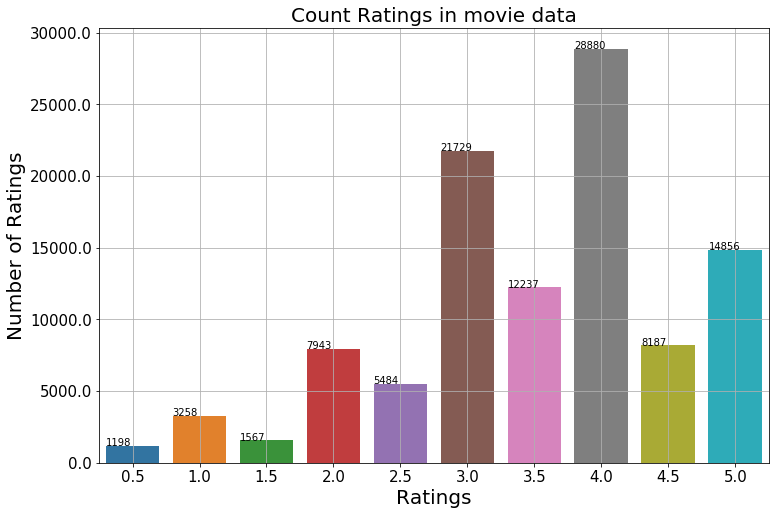

In [17]:
#Presentation of the distribution of the ratings :

plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data=df3)
for q in ax.patches:
    ax.annotate(str(q.get_height()), (q.get_x() , q.get_height()))
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count Ratings in movie data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.grid()

In [18]:
#Compute the cosine similarity between all movies
from sklearn.metrics.pairwise import cosine_similarity
cosine_array = np.round(cosine_similarity(df1.iloc[:,2:], df1.iloc[:,2:]),decimals=2)
cosine_array

array([[1.  , 0.77, 0.32, ..., 0.45, 0.  , 0.  ],
       [0.77, 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.32, 0.  , 1.  , ..., 0.71, 0.  , 0.  ],
       ...,
       [0.45, 0.  , 0.71, ..., 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]])

In [20]:
#Display cosine_similarity_matrix in a multi-index dataframe
cosine_similarity_matrix = pd.DataFrame(data=cosine_array, index=[df1['movieId'], df1['title']], columns=[df1['movieId'], df1['title']])
cosine_similarity_matrix

,movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
,title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Circle (2015),The Measure of a Man (2015),Bone Tomahawk (2015),Elämältä kaiken sain ( ),Creed (2015),Cosmic Scrat-tastrophe (2015),Le Grand Restaurant (1966),A Very Murray Christmas (2015),The Big Short (2015),Marco Polo: One Hundred Eyes (2015)
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1.00,0.77,0.32,0.26,0.45,0.0,0.32,0.63,0.0,0.26,...,0.00,0.00,0.0,0.32,0.00,0.77,0.45,0.45,0.00,0.0
2,Jumanji (1995),0.77,1.00,0.00,0.00,0.00,0.0,0.00,0.82,0.0,0.33,...,0.00,0.00,0.0,0.00,0.00,0.33,0.00,0.00,0.00,0.0
3,Grumpier Old Men (1995),0.32,0.00,1.00,0.82,0.71,0.0,1.00,0.00,0.0,0.00,...,0.00,0.00,0.0,0.50,0.00,0.41,0.71,0.71,0.00,0.0
4,Waiting to Exhale (1995),0.26,0.00,0.82,1.00,0.58,0.0,0.82,0.00,0.0,0.00,...,0.33,0.58,0.0,0.82,0.58,0.33,0.58,0.58,0.58,0.0
5,Father of the Bride Part II (1995),0.45,0.00,0.71,0.58,1.00,0.0,0.71,0.00,0.0,0.00,...,0.00,0.00,0.0,0.71,0.00,0.58,1.00,1.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146684,Cosmic Scrat-tastrophe (2015),0.77,0.33,0.41,0.33,0.58,0.0,0.41,0.41,0.0,0.00,...,0.00,0.00,0.0,0.41,0.00,1.00,0.58,0.58,0.00,0.0
146878,Le Grand Restaurant (1966),0.45,0.00,0.71,0.58,1.00,0.0,0.71,0.00,0.0,0.00,...,0.00,0.00,0.0,0.71,0.00,0.58,1.00,1.00,0.00,0.0


In [21]:
#Create a function with userId and N (number of movies to recommend) as inputs to recommend movies the user is most likely to enjoy
def recommendation_function (user, N):
        #Train a linear regression on how the selected user rates movies based on their genres using the movies he's seen and rated
        X= np.array(df3.loc[df3['userId']==user].iloc[:,5:25])
        y= np.array(df3.loc[df3['userId']==user]['rating'])

        regr = LinearRegression().fit(X,y)
        
        #Predict rating values from that user for all movies using the regression and add it as a new column on the dataframe
        df3['user_predict_rating']= regr.predict(df3.iloc[:,5:25])
        user_predict_frame = df3
        
        #Select the movie with highest predicted rating and extract its movidId
        highest_user_predict = df3.sort_values(by=['user_predict_rating'], ascending = False).head(1)["movieId"]
        
        #Check movie similarity between highest predicted movie and all other movies with cosine similarity matrix
        movie_similarity = cosine_similarity_matrix[highest_user_predict]
        
        #Sort similarities
        similar_movies_frame = movie_similarity.sort_values(by=movie_similarity.columns[0], ascending = False)

        #Convert to list
        similar_movies_list = similar_movies_frame.index.get_level_values(0).tolist()
        
        #Make a list of all movies already seen by user
        movies_already_seen = df3.loc[df3['userId']==user]["movieId"].tolist()
        
        #Remove films already seen from list of movies 
        cleared_ordered_list= [x for x in similar_movies_list if x not in movies_already_seen ]
        
        #Extract the top N number of movies to recommend
        movie_id_recommendations= [x for index, x in enumerate(cleared_ordered_list) if index < N]
        
        #Convert movie_id to film names
        recommendations_list= df3.loc[df3["movieId"].isin(movie_id_recommendations)]['title'].unique().tolist()
        
        #Compute coefficients for each movie genre for this user
        columns_ = df3.iloc[:,5:25].columns
        coefficients_df = pd.DataFrame(regr.coef_, columns_, columns=['Coefficients'])
        print(coefficients_df)
        
        #Compute intercept value of the linear regression for this user
        intercept = regr.intercept_
        print("Intercept value of the linear regr: {0:.4f}".format((intercept)))
        
        return recommendations_list

In [22]:
recommendation_function(1,5)

                    Coefficients
(no genres listed)      0.000000
Action                  0.160267
Adventure               0.499442
Animation               3.081096
Children               -2.717416
Comedy                 -0.324060
Crime                   1.023492
Documentary            -2.489387
Drama                   0.208149
Fantasy                 0.728587
Film-Noir              -0.343173
Horror                  0.347066
IMAX                    0.085763
Musical                 1.174406
Mystery                 0.196816
Romance                 0.054248
Sci-Fi                 -0.032355
Thriller                0.053345
War                     0.862376
Western                -0.196979
Intercept value of the linear regr: 2.9894


['Beowulf (2007)',
 'Princess Mononoke (Mononoke-hime) (1997)',
 'Ninja Scroll (Jûbei ninpûchô) (1995)',
 'Tekkonkinkreet (Tekkon kinkurîto) (2006)',
 'Yu-Gi-Oh! (2004)']